# Markov Chains and how they could have helped you get a job in 2015

# Introduction

The purpose of this tutorial is to intorduce you to Markov chains and their applications to the world of Data Science and Machine Learning. We will discuss what Markov chains are, in what situations they can be useful and how to implement them in your own project. The primary purpose is to be able to create a Markov Model for the Job Market during the years of 2004-2015. If we are able to understand what the best strategy to get a job in Data Science, Software Engineering, Management was during 2004-2015 it could help us accelerate our job search strategy in the present. If you want that high paying job this tutorial could help you figure out how to make on average \\$117,345 per year as a Data Scientist, \\$103,035 per year as a Software Engineer/Developer or \\$73,818 per year as a Manager. (Keep in mind these are only averages. Salaries taken from https://www.glassdoor.com/Salaries/)

## What are Markov chains?
A Markov chain can be defined as a mathematical system that is a collection of random variables that transition from one state to another based on transitions that satisfy the Markov property. The Markov property states that the probability of transitioning to any particular state is dependent solely on the current state and time elapsed, and not on the sequence of states that preceded it.
We will define a random variable as a variable whose possible values are numerical outcomes of a random pehnomenon. For this tutorial we will focus on discrete random variables - Discrete random variables can take on only a countable number of distinct values. 

At this point you might be thinking what exactly are states? What are probabilities of transitions? Well let's actually use you - my reader, and let's create a Markov Chain for the processes you will go through (Disclaimer: the probabilities used are only arbitrary, they do not represent my expectations on how much you gain from or enjoy this tutorial). 

<img src="img.png" style="height:550px"> 

In the Markov Chain above, the arrows between states are the transitions and the number beside them represent the transition probabilty. Any state and transition can be interpreted as: 
If you (the reader) are in State 1, i.e, are understanding the content of the tutorial(which I hope you are) then the probability you will transition to State 2, i.e, you enjoy the content of this tutorial is 0.3(30%). For each state you can move to another state or remain in the same state. If you model something using this process ensure that the sum of probabilities leaving a state = 1. The sum of transitions leaving State 3 = 0.2 + 0.8 = 1(100%). You want to define all possible states that you can transition to and from a particular state. 

The steps or states can be thought of as specific moments in time, you could define states to be anything you are attempting to model/simulate. States can be web pages, restraunts, your emotions, the weather, fake news articles or states of a conversation. Put simply a Markov chain is a method to model reality. 

## Transition Matrices
Looking back at our example of the states you will go through as a reader of this tutorial. We can build the following transition matrix. 

<img src="img.png" style="height:550px"> 
<img src="img1.png" style="height:150px"> 

The Matrix can be interpreted as the following(Assuming present time t = 9): 
P(reader in State 3 at t = 10 | reader in State 1 at t = 9) = 0.3

In [680]:
## If you were writing code to do the same your transition matrix M would look like the following
M = [[.4,.3,.3],[.4,.4,.4],[.2,.8,0]]

At this point it is important to remember the "Markov" in Markov chains. The Markov property states that if we know the value taken by a state at a given time, information about past states will not help us predict future behaviour. In our example you could argue that State 3 depends on State 1 but since we are using a Markov chain to model behaviour we will assume the following is true 
P(future | present, past) = P(future | present) 
This is known as the memoryless property of Markov chains. 

## Why understanding Markov Chains can be useful to you? 

Since Markov chains can be designed to model many real-world processes they can be used in a wide variety of situations in your daily life. They form the basis of search engine algorithms like page rank, they can be used to predict brand switching behaviour of customers(Chipotle might be interested in knowing the probability you switch loyalty to Cava next month, given that you are currently a loyal Chipotle customer) and they are even used to predict words being typed. If you ask a machine learning engineer how they would build a predictive model to generate text they would probably recommend using a Recurrent Neural Network. I would argue that a simple/traditional Markov model when implemented correctly could perform better than a deep learning model in certain cases. If you understand when and how to use these simple models you improve your performance as a Data Scientists, Machine Learning Engineer or human being. 

Understanding Markov chains can provide you with the ability to simulate reality using a computer. You can then use the results of the simulation to improve the current process or predict the future in this simulated world. Maybe this tutorial could provide you with the foundation you need to understand PageRank and work at Google? Or Maybe this tutorial could provide you some insights into your daily life which you can then optimize and improve? Or maybe this tutorial will help you finally understand why Chipotle has been sending you so many discount codes recently? 

## Using Markov Chains as a data scientist, engineer, computer scientist, human being 
When using Markov Chains in your daily life, you can expect to go through this sequence of steps. As you build your Markov Model expect to go between these steps multiple times and improve your model.  
<img src="img7.png" style="height:350px"> 

### Useful Tips for each Step
Step 1. As a beginner you may want to start working on time-series datasets. <br><br>
Step 2. Before writing any code identify your state/segements. These can be Job Categories: Software Engineer, Data Science or they can be Consumer Types: Active, Inactive, Neutral or they can be Customer Engagement: High, Medium, Low. They can really be anything you choose, as long as they are finite. You can then use the pandas groupBy to create groups of your segments, you can also use an unsupervised algorithm such as k-means. Clustering algorithms are useful to cluster similar behaviour/data across rows.<br><br>
Step 3. This is usually the most challenging aspect of using Markov Chains. There are several methods to define Transition Probabilites. You can use one of or multiple: <br>
        - Basic Conditional Probability: P(F|E) = P(F ∩ E)/P(E)
        - Bayes theorem: P(A|B) =  P(A) P(B|A)*P(B)
        - Define your own transition probabilities, using historical data from your dataset.
          (Later in this tutorial we actually define our own transition probabilities using a dataset)
Step 4. Once we have our transition probabilities, our goal is to build a model to simulate our end state probabilities. Markov chains are best represented using matrix-vector multiplication. If you have no prior experience in matrices and vectors it might be useful to read through this article to gain an in depth understanding https://mathinsight.org/matrix_vector_multiplication

We want to create a model that looks like: [End State] = [Transition Probabilites] * [Initial State]
<img src="img2.png" style="height:350px"> 
     

The dimensions of our Markov Model are as follows: <br>
Initial State N x 1 Vector - It is a vector having N rows and 1 column. N being the number of states in your model. We usually represent each row as the counts of that state. For example, if at a given time t, this tutorial has 123 readers in state 1. Entry 1 in Initial state = 123<br>
Transition Probabilities N x N Matrix - It has N rows and N columns. Entries in this Matrix are probabilities, of moving between states, the probabilities are <= 1<br>
End State N x 1 Vector - It has N rows and 1 column, i.e, one row for each state. <br>
Matrix vector multiplication is done between Transition Probabilities and Initial States, it is important to ensure that: <br>
Number of Rows in initial state vector = Number of columns in the Transition Matrix, this needs to be true for matrix vector multiplication. 

## Using Markov Chains to help you get a Data Science, Software Engineering, Management Job in 2019? 

In [1]:
import numpy as np
import pandas as pd
import nltk
from rake_nltk import Rake
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Installing Libraries
The only new library we will be using is rake_nltk 
You can install it using <br><br>
     pip install rake-nltk<br><br>
More information can be found on the PyPi website: https://pypi.org/project/rake-nltk/<br>
After you run the install, make sure the following commands work for you. If not the end of the tutorial has resources for libraries used. 

## Loading Data
The dataset is provided along with the tutorial folder. If needed download the dataset from the link and include it in the project folder. The path below assumes the 'data jobs.csv' file is in the same folder as this notebook. The dataset was obtained from Kaggle(https://www.kaggle.com/madhab/jobposts)
The dataset consists of 19,000 job postings from 2004-2015. Each job posting usually has some structure, although some fields of the posting are not necessarily filled out. 

In [682]:
data = pd.read_csv("data jobs.csv")
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [683]:
(data.dtypes)

jobpost             object
date                object
Title               object
Company             object
AnnouncementCode    object
Term                object
Eligibility         object
Audience            object
StartDate           object
Duration            object
Location            object
JobDescription      object
JobRequirment       object
RequiredQual        object
Salary              object
ApplicationP        object
OpeningDate         object
Deadline            object
Notes               object
AboutC              object
Attach              object
Year                 int64
Month                int64
IT                    bool
dtype: object

## Data Processing and Cleaning 
At this stage we will do the following: <br>
- Only use columns 'date', 'Title', 'JobDescription', 'JobRequirment'. For our analysis and Markov model we will not be needing any of the other columns. For the sake of simplicity we will assume Job Requirements and Job Descriptions influence the likelihood of you getting the job. 
- Eliminate Rows with blank Job Titles(blank titles will be of no use to us.)
- Replace Nans in all the job posting columns with " " (Since we use nlp later on this is useful)

In [684]:
df_relevant_cols = data[['date', 'Title', 'JobDescription', 'JobRequirment']]
blank_Title_indexes = df_relevant_cols[df_relevant_cols['Title'] == ''].index
df_relevant_cols = df_relevant_cols.drop(blank_Title_indexes)

df_relevant_cols.Title.fillna('', inplace=True)
df_relevant_cols.JobDescription.fillna('', inplace=True)
df_relevant_cols.JobRequirment.fillna('', inplace=True)

## Segment Our Data Set
Assuming a majority of my audience is either involved with data science, software engineering/development, Management(Project Management, Product Management). We will use three main states/segments. The dataset had many different categories, but at this point we are defining/choosing only the states we are interested in. 
- Data(Including Data Science, Data Engineering)
- Software(Including Software Design, Engineering, Development)
- Manager(Including Project Management, Product Management etc)
<br><br>
When segmenting our data, our goal is to be as broad as possible yet have some definition for each state. I am sure you are familiar with the same while applying to jobs. We tend to apply to as many as possible to maximize our odds of getting an interview. In order to do this, I decided to define the categories as follows: 
- Data: If title includes the word 'data'
- Software: If title includes the word 'software'
- Manager: If title includes the word 'manager'
<br><br>

In [685]:
categories = ["data", "software","manager"]
# Helper to decide which category a job is in
def assigner(title):
    for job in categories:
        if job in title.lower() :
            return job
    return "None"

df_relevant_cols["category"] = df_relevant_cols.Title.apply(lambda x: assigner(x))

## We want to drop all rows that did not fall into any of our categories
blank_category_indexes = df_relevant_cols[df_relevant_cols['category'] == "None"].index
df_relevant_cols = df_relevant_cols.drop(blank_category_indexes)

<img src="img4.png" style="height:550px"> 

## Visualising number of postings in Each category

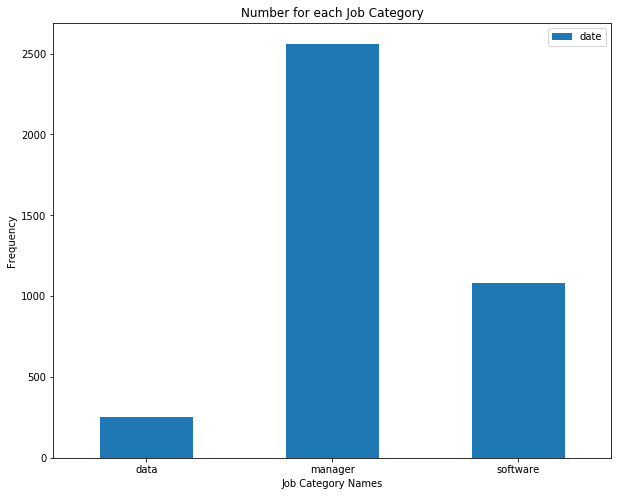

In [686]:
counts = df_relevant_cols[['date', 'category']]
ax = counts.groupby(['category']).count().plot(kind='bar',
                                    figsize=(10,8),
                                    title="Number for each Job Category")
ax.set_xlabel("Job Category Names")
ax.set_ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

## Grouping our data based on Time
This will help us build present and future states. For the purpose of this tutorial since our dataset has Job postings from 2004-2015, we will group based on the following:<br>
1. All Postings posted on or before the year 2009 fall in our current state. (We will model our transitions assuming we are currently a data scientist/software engineer/manager in the (2004-2009) time span. <br>
2. All postings after 2009 until 2015 will be our future/next states. 
In out case we will now have two possible times, t = Current State or t = Next State

(Note: When you use Markov chains you can have multiple times, t = 0, t = 1, t = 2, ..., t = 10000 (in this case t = 2019, 2020,...,2050,...) As long as you have a transition matrix for consecutive time stamps/categories(for example one transition matrix from t = 0 to t = 1, one transition matrix from t = 1 to t = 2.
   

In [687]:
df_relevant_cols['date'] = pd.to_datetime(df_relevant_cols['date'], errors = 'coerce')

# two categories of time we can have in our model
categories = ["Current State", "Next State"]

#Helper to assign Time_stamp_category
def assigner(date):
    if date.year < 2010:
        return categories[0]
    else:
        return categories[1]
df_relevant_cols["Time_stamp_category"] = df_relevant_cols.date.apply(lambda x: assigner(x))
df_relevant_cols.head()

,date,Title,JobDescription,JobRequirment,category,Time_stamp_category
4,2004-01-10,Software Developer,,- Rendering technical assistance to Database M...,software,Current State
14,2004-01-14,General Manager,,- Manage and control the company's activities ...,manager,Current State
41,2004-02-01,Program Manager - Children's Programs,We are currently seeking a Program Manager to ...,,manager,Current State
50,2004-02-04,Programs Manager,Armenian Caritas is seeking an experienced Pro...,- Monitor the overall programs performance and...,manager,Current State
58,2004-02-08,General Manager,Teleplus LLC is looking for a General Manager.,- Manage and control the company's activities ...,manager,Current State


### Visualising Current and Next States

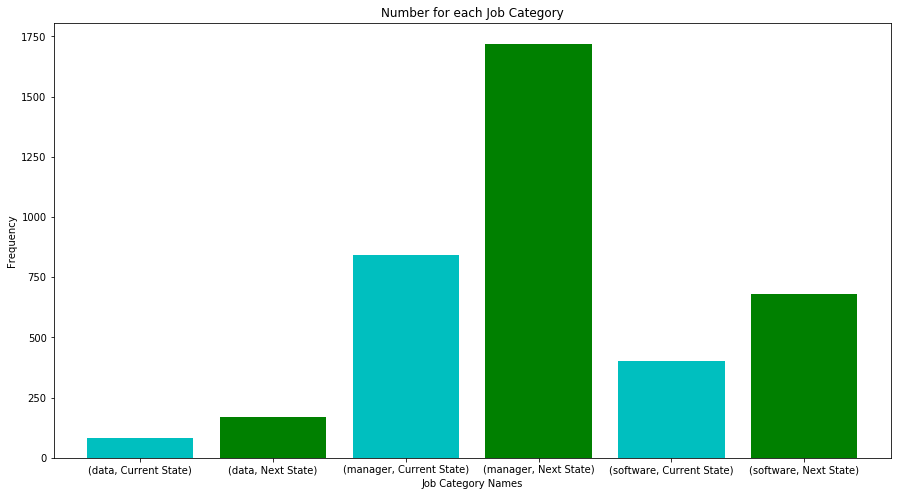

In [688]:
# Code below used only for visualisation purposes, you do not need to understand what is happening here. 
# If you would like to I have attached resources on using matplotlib
ax = df_relevant_cols.groupby(['category','Time_stamp_category'])['category'].count().plot(kind='bar', 
                                                         figsize=(15,8),title="Number for each Job Category",
                                                         color=['c', 'g'], width=0.8)
#vals = df_relevant_cols.groupby(['category','Time_stamp_category'])['category'].count()
ax.set_xlabel("Job Category Names")
ax.set_ylabel("Frequency")
#L=plt.legend()
#L.get_texts()[0].set_text('Time t = 0 (Present States)')
#L.get_texts()[1].set_text('Time t = 1 (Next States)')
plt.xticks(rotation=0)
plt.show()

The data shows that in the future there will be more job postings for each category. 

### Creating our transition matrix 
In order to create this matrix, we will make use of our dataset in the following manner<br>(The diagram below represents what we will do only for the state = data science (t = present))

<img src="img5.png" style="height:550px"> 

To find the conditional probabilities, we will do the following. 
- For all Next State Job Postings (2010-2015), we will analyze the Job Postings and Requirements 
- For each category: software, data, manager we will combine all the Job Descriptions and Job Requirements 
Essentially we will be doing the following: 
    1. Create one string called combined job descriptions. This will be all job descriptions in the 'software category' and the 'Next State' time stamp. 
    2. Create one string called combined job requirements. This will be all job requirements in the 'software category' and the 'Next State' time stamp. 
We will need 1, 2 for each category. The categories being('data', 'Next State'), ('software', 'Next State'), ('manager', 'Next State')
    3. Extract Keywords for each category. Combine the Keywords obtained from job descriptions and requirements
- For each word in the keyword we will compare it to the job title we have in the current state. 
- Higher Similarity between our current job title and the keywords we found will indicate a higher probability of having that job in the next state. 

## Analysing Job Descriptions and Job Requirements 2010-2015
We will only be considering next states. 
Our goal is to group all Job Descriptions and requirements for each job category (Data, Software, Management)
Under the code you can find what we are trying to do for each category, Next State pair. The output generated is the grouped job description for category = data, timestamp category = Next State

In [689]:
# Only considering next states 
current_state_indices = df_relevant_cols[df_relevant_cols['Time_stamp_category'] == 'Current State'].index
df_next_states = df_relevant_cols.drop(current_state_indices)


jobs = ["software", "manager", "data"]
grouped_next_states = df_next_states.groupby(['category','Time_stamp_category'])

# Combine JobDescription
grouped_descriptions = grouped_next_states['JobDescription'].sum()

# Combine JobRequirment
grouped_requirements = grouped_next_states['JobRequirment'].sum()
for items in grouped_descriptions.iteritems():
    print (items)
    break

(('data', 'Next State'), 'We are looking for a dedicated person, ready to fulfil\r\nthe position of Database Administrator.The primary objective of the Software Developer\r\nposition is to produce required product following processes in\r\nconjunction with team members that is of high quality and is timely.The primary objective of the Software Developer\r\nposition is to produce required product following processes in\r\nconjunction with team members that is of high quality and is timely.EPAM Systems is actively looking for MS SQL Database\r\nDevelopers for complex and long-term projects. The position entails\r\nworking with Microsoft products.Under the overall guidance of the UNDP Environmental\r\nGovernance Portfolio Analyst and supervision of the Project Team Leader,\r\nthe Database and Information Systems Specialist is expected to accomplish\r\ntasks in accordance with the requirements provided below, and work in\r\ncooperation with other local consultants, contractual-service comp

### Extracting keywords from Job Description and Job Requirements for each category
Using the above grouped descriptions, we can then find keywords. Our aim is to find a list of keywords like <br>
keywords = ['software', 'development', 'software engineer', 'application engineering'], the keywords found from the descriptions and requirements will be combined. <br>
For each next state: <br>
(data, next state)<br>
(manager, next state)<br>
(software, next state) <br>
we will have a list of keywords found from the requirements and description. 

In [690]:
# we will use a dictionary to keep track of keywords for a specific job category
# we will end with a dictionary that looks like the following.
# keyword = {'data':['data engineer', 'machine learning'], 'manager':['leader'], 'software':['engineer','design']}
keywords ={}
r = Rake() # Used to extract keywords (import rake_nltk)
for item in grouped_descriptions.iteritems():
    job_category = item[0][0]
    description = item[1]
    r.extract_keywords_from_text(description)
    keywords_list = r.get_ranked_phrases()
    keywords[job_category] = keywords_list
for item in grouped_requirements.iteritems():
    job_category = item[0][0]
    requirements = item[1]
    r.extract_keywords_from_text(requirements)
    keywords_list = r.get_ranked_phrases()
    keywords[job_category].extend(keywords_list)

print(len(keywords['software']))
print(keywords['software'])
## You DO Not need to go through the output generated but it is included for your reference

4787
['debugging database driven web based enterprise level software using c', 'software engineer performs software engineering assignments following designated standards', 'database driven web based enterprise level software using c', 'debugging software using c #/ c ++, developing web', 'support critical work streams within companys software engineering team', 'debugging database driven web based enterprise level software', 'perform software engineering assignments following designated standards', 'incumbent performs complex software engineering duties using', 'software development team manager makes key technical architecture', 'gui based application development using c ++', 'software developer c #/ c ++', 'seeking experienced java developers particularly senior level', 'seeking experienced java developers including senior level', 'c ++/ cgi software senior developer', 'enterprise grade software systems using microsoft', 'software development area thus acquiring real', 'prepare easy

Just for the software category of jobs we 4787 keywords !! (Exciting right)

## Calculating P(job at next state | job at current state) i.e the transition probabilities
In order to do this we will say the transition probabilities depend on the number of times the category is included in the keyword for our next state job. 
For example if we need to find <br>
P(job = data, t = next | job = software, t = current) 
In order to find the probability for each next state given current state we do the following: <br>
1. Check for the existence of current category in keywords. In this case number of times we find 'data' in the keywords for software 2010-2015
2. If we do not find any existence of the current category, we want to check the similarity between the two words. For that we consider the edit difference between them. (We use Levenshtein distance which is a string metric for measuring the difference between two sequences). The similarity can then be weighted as 20 - edit distance. We add that similarity to the likelihood of transition. Lower edit distances indicate a higher similarity between words. 

NOTE: Since the dataset had many more job postings related to 'Manager', we consider the keywords.count('job category')/total_number of jobs in this category in the next state. Although there are many more Manager Jobs in the next state we should consider the density of occurences of 'manager' with relation to the number of manager postings in the next state. 

3. Once this is done we should normalise our results to get the probabilties on a scale of 0-1.00

In [691]:
df_counts_next = df_next_states.groupby(['category','Time_stamp_category']).size().reset_index(name='counts')
print(df_counts_next)

   category Time_stamp_category  counts
0      data          Next State     170
1   manager          Next State    1720
2  software          Next State     680


In [692]:
total_data_jobs_next_state = 170.0
total_manager_jobs_next_state = 1720.0
total_software_jobs_next_state = 680.0

In [693]:
# we will use a dictionary to store the transition probabilities. We would like to create a dictionary like:
# scores = {'software':{'software':0.2, 'data':0.6, 'manager':0.2}, 
#           'data':{'software':0.3, 'data':0.6, 'manager':0.1},
#           'manager':{'software':0.3, 'data':0.2, 'manager':0.5}}
# The Keys of score correspond to the current state job 
# the keys of the dictionary within a particular entry correspond to the next state
# P(job = data, t = next | job = software, t = current) = scores[software][data]
transition_probs = {"software":{"software":0.0, "manager":0.0, "data":0.0}, 
                    "data":{"software":0.0, "manager":0.0, "data":0.0},
                    "manager":{"software":0.0, "manager":0.0, "data":0.0}
                   }
job_categories = ["software", "manager", "data"]
for job in job_categories:
    job_keywords = keywords[job]
    length_keywords = len(job_keywords)
    for word in job_keywords:
        if("software" in word):
            transition_probs["software"][job]+= word.count(job)/total_software_jobs_next_state
        else:
            diff = nltk.edit_distance("software", word)
            similarity = 20-diff
            transition_probs["software"][job]+= similarity/total_software_jobs_next_state
        if("manager" in word):
            transition_probs["manager"][job]+= word.count(job)/total_manager_jobs_next_state
        else:
            diff = nltk.edit_distance("manager", word)
            similarity = 20-diff
            transition_probs["manager"][job]+= similarity/total_software_jobs_next_state
        
        if("data" in word):
            transition_probs["data"][job]+= word.count(job)/total_data_jobs_next_state
        else:
            diff = nltk.edit_distance("data", word)
            similarity = 20-diff
            transition_probs["data"][job]+= similarity/total_software_jobs_next_state
            
print(transition_probs)        

{'software': {'software': 31.886764705882978, 'manager': 142.04264705882528, 'data': 25.49852941176512}, 'data': {'software': 25.511764705882587, 'manager': 117.51617647058852, 'data': 27.36764705882372}, 'manager': {'software': 28.223461012312185, 'manager': 149.53532831737778, 'data': 26.344083447332746}}


In [694]:
for key in transition_probs:
    total = 0.0
    likelihood = transition_probs[key]
    for key1 in likelihood:
        total+=likelihood[key1]
    for key1 in likelihood:
        likelihood[key1] = likelihood[key1]/total
print(transition_probs)

{'software': {'software': 0.15989115927174138, 'manager': 0.7122504811556573, 'data': 0.12785835957260133}, 'data': {'software': 0.1497208053922972, 'manager': 0.6896667788623346, 'data': 0.16061241574536805}, 'manager': {'software': 0.1382805671880259, 'manager': 0.732646857355807, 'data': 0.12907257545616715}}


#### We have the following Markov Model and Transition Matrix:
<img src="img6.png" style="width:850px">
<img src="img3.png" style="width:550px">

## Putting it all together
We are now ready to simulate reality! 

### Initial State

In [695]:
next_state_indices = df_relevant_cols[df_relevant_cols['Time_stamp_category'] == 'Next State'].index
df_current_states = df_relevant_cols.drop(next_state_indices)
df_counts_current = df_current_states.groupby(['category','Time_stamp_category']).size().reset_index(name='counts')
print(df_counts_current)

   category Time_stamp_category  counts
0      data       Current State      82
1   manager       Current State     842
2  software       Current State     403


In [696]:
# initial state
init_state = np.array([82, 842, 403])

## Transition Matrix

In [697]:
# transition matrix
transition_matrix = np.array([[ 0.15989115927174138, 0.12907257545616715, 0.12785835957260133], 
              [ 0.6896667788623346, 0.732646857355807 ,0.7122504811556573], 
              [ 0.1497208053922972, 0.1382805671880259 ,0.15989115927174138]])

Text(0,0.5,'Number of Jobs')

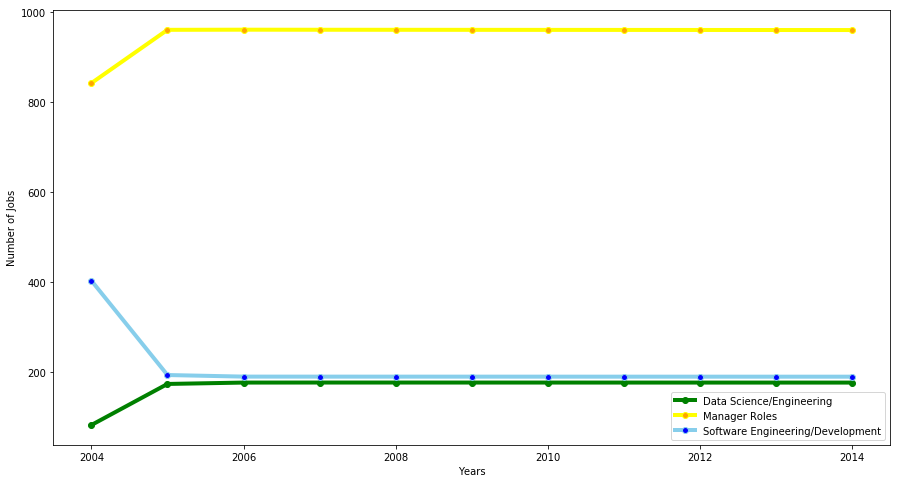

In [698]:
data,manager,software = [],[],[]
for i in range(2004, 2015):
    data.append(init_state[0])
    manager.append(init_state[1])
    software.append(init_state[2])
    temp = init_state
    init_state = transition_matrix.dot(temp)

# plotting
plt.figure(figsize=(15,8))
plt.plot( [x for x in range(2004, 2015)], data, marker='o', linewidth=4,label='Data Science/Engineering', markerfacecolor='green', color='green')
plt.plot( [x for x in range(2004, 2015)], manager, marker='o', linewidth=4,label='Manager Roles', markerfacecolor='orange', color='yellow')
plt.plot( [x for x in range(2004, 2015)], software, marker='o', linewidth=4,label='Software Engineering/Development',markerfacecolor='blue', color='skyblue')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Number of Jobs')

In [699]:
init_state

array([ 176.32883623,  959.8980171 ,  189.44391991])

## Conclusion 
When considering the transition matrix for our jobs we can conclude the following: 
During 2004 - 2015 it was easier to transition from Software Engineer -> Manager than it was to transition from Data Scientist -> Manager. <br>
It is much easier and more likely to move from a technical role to a non-technical role. During 2004 - 2015, if you started your career as a Software Engineer or Data Scientist it would have been easy for you to move into the position of being a Manager. However, if you wanted to move from Manager to Software or Data Science it would have been much more challening. <br>
Markov Chains Make several assumptions: 
    - There are a finite set of states
    - The probabilities of moving between states are fixed
    - There are no restrictions on moving in between states
When looking at our final plot generate, there is a point at which the rate of change of jobs slows down. This is due to the assumption that the probabilities of moving between states are fixed. The next step in this tutorial would be to improve this model we have by updating our transition probabilities between each year. This would lead to more accuracy and a better simulation of the real world. 


## Resources
### Interesting Markov Chain Projects: 
Interesting Ideas https://www.quora.com/What-are-the-most-interesting-applications-of-Markov-chains<br>
Markov Chains in R https://www.datacamp.com/community/tutorials/markov-chain-analysis-r<br>
Easy Markov Chain Project to predict the weather https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial<br>
Generate song lyrics using Markov Chains https://medium.com/ymedialabs-innovation/next-word-prediction-using-markov-model-570fc0475f96<br>
Generating music using Markov Chains https://hackernoon.com/generating-music-using-markov-chains-40c3f3f46405<br>
### Markov Chain Theory, Probability
Hidden Markov Models Tutorial http://di.ubi.pt/~jpaulo/competence/tutorials/hmm-tutorial-1.pdf
Time Series Modelling https://www.stat.ncsu.edu/people/bloomfield/courses/st810j/slides/time-series-modeling.pdf
Markov Chains http://people.math.aau.dk/~jm/courses/PhD06StocSim/Chapters2.4.5.pdf
Conditional Probability: https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/Chapter4.pdf

### Libraries Used
Rake nltk: https://pypi.org/project/rake-nltk/<br>
Matplotlib: https://matplotlib.org/<br>
nltk: https://www.nltk.org/<br>
(wordnet and word_tokenize also used from nltk.corpus and nltk.tokenize)    

[0.0, 0.007959, 0.015035999999999999, 0.021231, 0.026544, 0.030975000000000003, 0.034524, 0.037191, 0.038976000000000004, 0.039879000000000005, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
[0.1, 0.0958, 0.0916, 0.0874, 0.0832, 0.079, 0.0748, 0.07060000000000001, 0.0664, 0.062200000000000005, 0.057999999999999996, 0.0538, 0.0496, 0.0454, 0.0412, 0.037000000000000005, 0.0328, 0.028600000000000004, 0.024400000000000005, 0.020200000000000006, 0.015999999999999997, 0.011799999999999998, 0.007599999999999998, 0.0033999999999999985, -0.0008000000000000007, -0.005, -0.0092, -0.013399999999999999, -0.017599999999999998]


Text(0,0.5,'i_N (Amperes)')

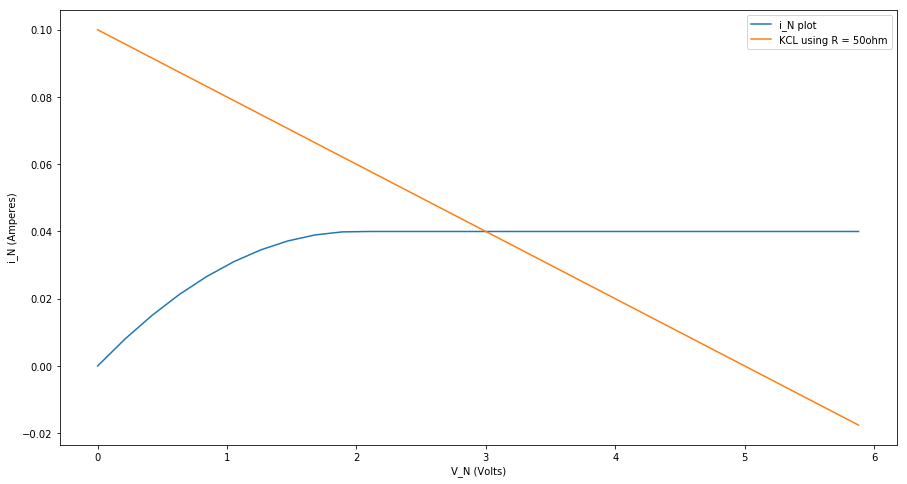

In [32]:
v_n = [ ]
i = 0.0
while i< 6.0:
    v_n.append(i)
    i+=0.21
i_n = [ ]
i_n_1 = [ ]
i_n_2 = [ ]
for val in v_n:
    if val <= 2.0:
        i_n.append(((4.0-val)/100.0)*val)
    else:
        i_n.append(0.04)
    i_n_1.append((5.0-val)/50)
    i_n_2.append((5.0-val)/100)
print(i_n)
print(i_n_1)
plt.figure(figsize=(15,8))
plt.plot(v_n,i_n, label='i_N plot')
plt.plot(v_n, i_n_1, label = "KCL using R = 50ohm")
plt.legend(loc='best')
plt.xlabel('V_N (Volts)')
plt.ylabel('i_N (Amperes)')

Text(0,0.5,'i_N (Amperes)')

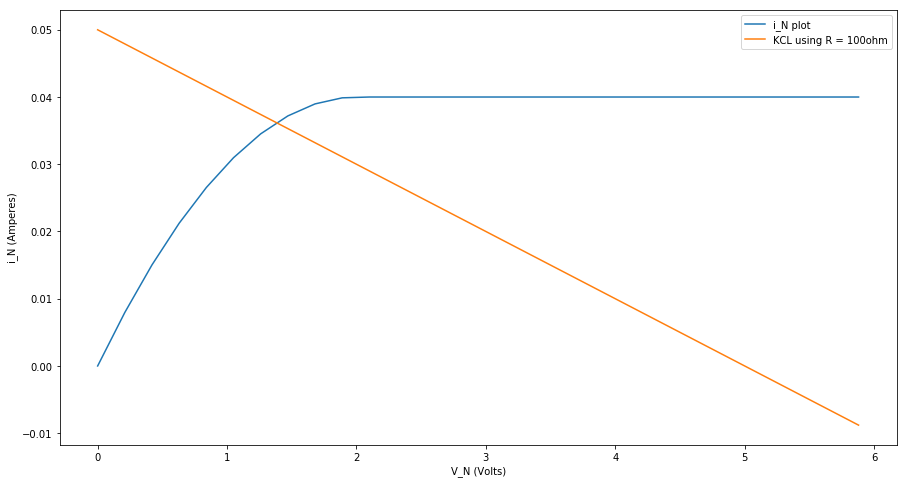

In [33]:
plt.figure(figsize=(15,8))
plt.plot(v_n,i_n, label='i_N plot')
plt.plot(v_n, i_n_2, label = "KCL using R = 100ohm")
plt.legend(loc='best')
plt.xlabel('V_N (Volts)')
plt.ylabel('i_N (Amperes)')

In [7]:
## Set up parameters
import math
i_S = 10**(-11)
v_T = 25*(10**(-3))


In [8]:
def f(i_S, v_D, v_T, R, V_OP):
    diff = 10000
    while(diff > .01):
        i_D = i_S(math.exp(v_D/v_T)-1)
        new_v_D = V_OP - (i_D*R)
        diff = abs(new_v_D - v_D)
        v_D = new_v_D
    
    return v_D
    
    

In [9]:
##a
v_D = f(i_S, 0.25, v_T, 30, .3)


TypeError: 'float' object is not callable